<a href="https://colab.research.google.com/github/CopypastCore/Torrent/blob/main/regression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы машинного обучения: лабораторная работа №2
## <!--Задание 1. -->Регрессионный анализ

В этом задании необходимо реализовать обучающиеся модели в контексте решения задачи регрессии на одном из представленных по варианту задания наборе данных.

### Цель

Получение навыков решения задачи регрессионного анализа и оптимизации функций методом градиентного спуска

### Оценивание и баллы

За это задание в общей сложности можно получить до 8 баллов. Задание частично проверяется автоматически, а частично будет оцениваться вручную. Чтобы получить максимальный балл,  необходимо успешно выполнить все приведенные ниже задачи.


***
#### Задачи

#### 1. Определить номер варианта
Перейдите по ссылке из личного кабинета на Google Таблицу со списком студентов. Найдите свое ФИО в списке и запомните соответствующий порядковый номер (поле № п/п) в первом столбце. Заполните его в ячейке ниже и выполните ячейку. Если вы не можете найти себя в списке, обратитесь к своему преподавателю.

In [6]:
### BEGIN YOUR CODE

Student_ID = 21

### END YOUR CODE

Теперь выполните следующую ячейку. Она вычислит номер задания и выведет его.

In [7]:
datasets = [('Combined Cycle Power Plant','https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant'), ('Beijing PM2.5','https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data'), ('Airfoil Self-Noise','https://archive.ics.uci.edu/dataset/291/airfoil+self+noise'), ('Energy Efficiency','https://archive.ics.uci.edu/dataset/242/energy+efficiency'), ('Bike Sharing','https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset'), ('Diabetes dataset','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'), ('California Housing','https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#fetch-california-housing'), ('Auto MPG', 'https://archive.ics.uci.edu/dataset/9/auto+mpg'), ('Forest Fires', 'https://archive.ics.uci.edu/dataset/162/forest+fires'), ('Concrete Compressive Strength', 'https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength')]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Информация о датасете '{datasets[dataset_id][0]}' доступна по следующей ссылке: {datasets[dataset_id][1]}")

Информация о датасете 'Beijing PM2.5' доступна по следующей ссылке: https://archive.ics.uci.edu/dataset/381/beijing+pm2+5+data


#### 2. Подготовить среду разработки и данные
Добавьте импорт всех необходимых библиотек в ячейке ниже. Постарайтесь не импортировать библиотеки в других ячейках, чтобы избежать ошибок в коде

In [63]:
### BEGIN YOUR CODE
#!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### END YOUR CODE

При необходимости скачайте датасет с помощью команды `!wget ...` и разархивируйте его. Загрузите датасет в переменную `dataset`, с которой будете дальше работать

In [10]:
### BEGIN YOUR CODE

#!wget https://archive.ics.uci.edu/static/public/381/beijing+pm2+5+data.zip

#!unzip beijing+pm2+5+data.zip
# !tar ...
# !gunzip ...

dataset = pd.read_table('PRSA_data_2010.1.1-2014.12.31.csv')
#print(dataset.columns.tolist())

dataset = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
dataset.to_csv('PRSA_data_2010.1.1-2014.12.31.tsv', sep='\t', index=False)

### END YOUR CODE

####  3. Посмотреть на общую картину (0.5 балла)
Ознакомьтесь с информацией о датасете по ссылке из задания и **напишите один абзац текста с описанием решаемой задачи**. В частности, ответьте в своем тексте на следующие вопросы:

 * Каков размер датасета? (в Мб)
 * Сколько в нем записей (объектов)?
 * Сколько признаков (фич) у объектов в датасете?
 * Есть ли категориальные данные? Какие?
 * Есть ли пропущенные значения?
 * Есть ли в датасете столбец с ответами (target)? Какой у него тип данных?
 * Какую задачу может решать регрессионная модель, построенная на этом датасете? Какую величину она будет предсказывать?
 * Приведите основные статистические данные о датасете, которые можно получить вызовом одной-двух функций в pandas. Какие выводы о датасете можно сделать?

В ячейке ниже напишите код, который выводит всю необходимую информацию, а в ячейке под ней (ее тип - Markdown, т.е. текст) опишите своими словами решаемую задачу и используемый набор данных.

In [11]:
### BEGIN YOUR CODE

size_mb = dataset.memory_usage(deep=True).sum() / (1024 * 1024)
n_records, n_features = dataset.shape
categorical_cols = dataset.select_dtypes(include=['object']).columns.tolist()
missing_values = dataset.isnull().sum().sum()

target_dtype = dataset['pm2.5'].dtype

print(f"1. Размер датасета: {size_mb:.2f} МБ")
print(f"2. Количество записей: {n_records}")
print(f"3. Количество признаков: {n_features}")
print(f"4. Категориальные признаки: {categorical_cols}")
print(f"5. Общее количество пропущенных значений: {missing_values}")
print(f"6. Целевая переменная ('pm2.5'): тип данных = {target_dtype}")

print(dataset.describe())

### END YOUR CODE

1. Размер датасета: 6.48 МБ
2. Количество записей: 43824
3. Количество признаков: 13
4. Категориальные признаки: ['cbwd']
5. Общее количество пропущенных значений: 2067
6. Целевая переменная ('pm2.5'): тип данных = float64
                 No          year         month           day          hour  \
count  43824.000000  43824.000000  43824.000000  43824.000000  43824.000000   
mean   21912.500000   2012.000000      6.523549     15.727820     11.500000   
std    12651.043435      1.413842      3.448572      8.799425      6.922266   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    10956.750000   2011.000000      4.000000      8.000000      5.750000   
50%    21912.500000   2012.000000      7.000000     16.000000     11.500000   
75%    32868.250000   2013.000000     10.000000     23.000000     17.250000   
max    43824.000000   2014.000000     12.000000     31.000000     23.000000   

              pm2.5          DEWP          TEMP          PRES    

**Beijing PM2.5** представляет собой почасовой набор данных загрязнения PM2.5 посольства США в Пекине. Включают в себя метеорологические данные из международного аэропорта Пекин Шоуду.
Данные относятся к периоду с 1 января 2010 года по 31 декабря 2014 года.
Отсутствующие данные обозначаются как «NA».   
**PM2.5** - это тонкие, или особо мелкие твердые частицы размером 2,5 микрона и меньше, которые находятся во взвешенном состоянии в воздухе. Эти частицы настолько малы, что могут проникать глубоко в дыхательные пути и даже в кровь, что вызывает различные проблемы со здоровьем.

1.   **Характеристика набора данных:** Многомерность, времянные ряды;
2.   **Предметная область:** Климат и окружающая среда;
3.   **Связанные задачи:** Регрессия;
4.   **Тип функции:** Целочисленные, вещественные;
5.   **Экземпляров:** 43824;
6.   **Количество параметров:** 13;
       *   No: номер строки;
       *   Year: год данных в строке;
       *   Month: месяц данных в строке;
       *   Day: день данных в строке;
       *   Hour: час данных в строке;
       *   PM2.5: концентрация PM2.5;
       *   DEWP: точка росы;
       *   ТEMP: температура в градусах Цельсия;
       *   PRES: давление в гПа;
       *   cdwd: комбинированное направление ветра;
       *   IWS: кумулятивная скорость ветра в м/с;
       *   Is: накопленное количество часов снега;
       *   Ir: суммарные часы дождя.
7.   **Размер датасета:** 6.48 Мб.

Таблица значений:\
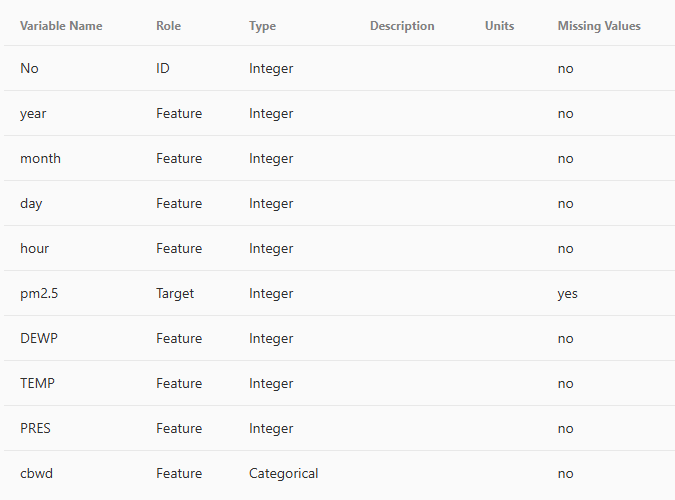

Анализ модели позволяет получить представление о влиянии выборосов в атмосферу продуктов сгорания топлива на изменение уровня PM2.5. Результаты говорят о том, что переход от потребления энергии на основе угля к гораздо более экологичным альтернативам в Пекине является ключом к решению проблем PM2.5 в Пекине.

<!-- Размер датасета составляет 100500 килобайт, что соответствует 100,5 мегабайтам. В датасете содержится описание ... -->

---
#### 4. Анализ данных, очистка, и масштабирование (2 балла)

**Анализ данных:** проверьте наличие корреляции между признаками, постройте корреляционную матрицу. Некоторые из признаков могут оказаться более коррелированными с объясняемой переменной (target), чем остальные. Эта информация в дальнейшем поможет провалидировать найденные коэффициенты регрессионной модели.

**Очистка данных:** если датасет содержит пропущенные значения, заполните их с помощью модуля [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html). Если в датасете есть категориальные признаки, [преобразуйте их в числовые](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features) с помощью `OneHotEncoder`.

**Масштабирование признаков.** Напишите код, осуществляющий нормализацию значений всех признаков [следующим образом](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling):

- вычесть среднее значение соответствующего признака из всех значений этого признака;
- отмасштабировать (поделить) значения признаков на СКО этих признаков.

**Особенности реализации:** напишите код, который реализует последовательность (пайплайн) обработки обучающих данных, а затем примените его к валидационной и тестовой выборкам в случае их наличия.

In [13]:
print(type(y))
print(y.dtype)
print(y.head(100))
print(y.isnull().sum())
print(y.median())
y = y.fillna(y.median(), inplace=True)

<class 'pandas.core.series.Series'>
float64
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
95    31.0
96    30.0
97    34.0
98    27.0
99    25.0
Name: pm2.5, Length: 100, dtype: float64
2067
72.0


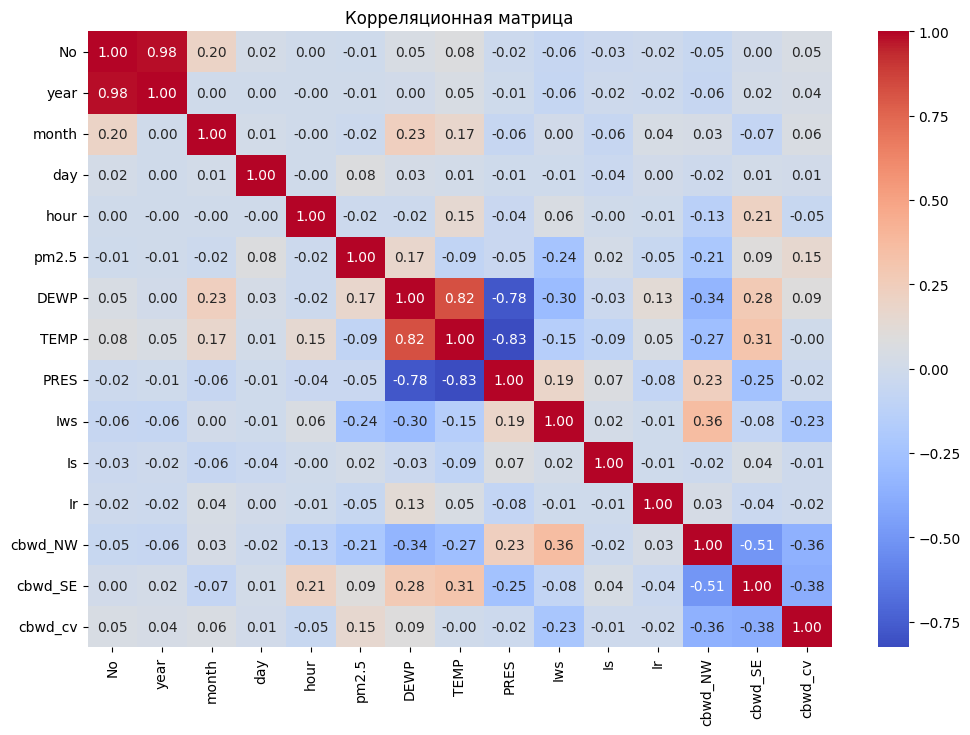


Обработанные обучающие данные (первые 5 строк):
       DEWP      TEMP      PRES       Iws        Is        Ir  cbwd_NW  \
0 -0.605992 -0.524979 -0.046709  0.030492 -0.070832 -0.136965      1.0   
1  0.293956 -0.033004 -0.144139 -0.459009 -0.070832 -0.136965      0.0   
2  1.055450  0.868949 -1.215870 -0.289803 -0.070832 -0.136965      0.0   
3 -1.782847 -1.754915  1.512174  0.297438 -0.070832 -0.136965      1.0   
4 -1.505940 -0.606974  0.148152  0.332872 -0.070832 -0.136965      1.0   

   cbwd_SE  cbwd_cv  
0      0.0      0.0  
1      0.0      1.0  
2      1.0      0.0  
3      0.0      0.0  
4      0.0      0.0  


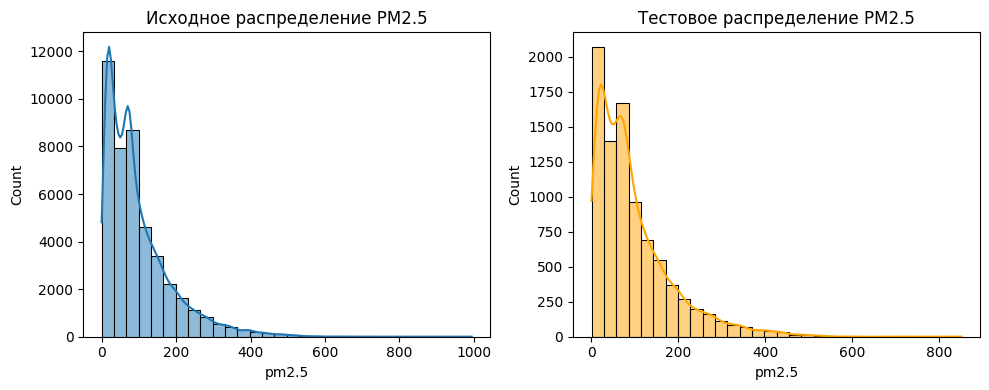

In [14]:
### BEGIN YOUR CODE

temp_data = dataset.copy()
temp_data.fillna(dataset.median(numeric_only=True), inplace=True)

# Преобразование категориальных признаков
temp_data = pd.get_dummies(temp_data, columns=['cbwd'], drop_first=True)

# Корреляция с целевой переменной (PM2.5)
plt.figure(figsize=(12, 8))
sns.heatmap(temp_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()

numeric_feat = ['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir']
categ_feat = ['cbwd']

#y = y.replace(['NaN', 'nan', 'NA'], np.nan)
#y = y.fillna(y.median(), inplace=True)

target_column = 'pm2.5'

X = dataset[numeric_feat + categ_feat]
y = dataset[target_column]

# бинизация y для StratifiedShuffleSplit
y_bin = pd.cut(y, bins=5, labels=False)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(X, y_bin):
    X_train_raw = X.iloc[train_idx]
    X_test_raw = X.iloc[test_idx]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]



numeric_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categ_transform = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False))
])

# Объединение
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transform, numeric_feat),
        ('cat', categ_transform, categ_feat)
    ])

# Полный пайплайн
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Обучаем трансформеры на обучающей выборке и применяем к обеим
X_train_processed = pipeline.fit_transform(X_train_raw)
X_test_processed = pipeline.transform(X_test_raw)


# Имена признаков после OneHotEncoder
cat_encoder = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
feature_names = numeric_feat + list(cat_encoder.get_feature_names_out(categ_feat))

print("\nОбработанные обучающие данные (первые 5 строк):")
print(pd.DataFrame(X_train_processed, columns=feature_names).head())

# Распределение целевой переменной до/после разделения
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(y, kde=True, bins=30)
plt.title("Исходное распределение PM2.5")

plt.subplot(1, 2, 2)
sns.histplot(y_test, kde=True, bins=30, color='orange')
plt.title("Тестовое распределение PM2.5")
plt.tight_layout()
plt.show()

# рекомендуется разбить выборку на обучающую и тестовую, например, с помощью StratifiedShuffleSplit из sklearn.model_selection

# при необходимости добавьте дополнительные ячейки с кодом, чтобы разбить код на смысловые блоки и повысить его читабельность

### END YOUR CODE

- - -
#### 5. Реализовать градиентный спуск (3 балла)
Используйте описание метода градиентного спуска, которое было приведено на лекции. Не забудьте добавить в матрицу признаков обучающей выборки столбец $\textbf{x}_0$, заполненный единицами. Напишите код, реализующий класс **LinearRegressionModel** и объявленные в нем методы.

**Градиентный спуск:** ЗАПРЕЩАЕТСЯ вызывать какие-либо библиотечные функции и использовать иной готовый код для построения модели линейной регрессии и поиска ее параметров. Можно использовать только базовые математические операции из пакета numpy, например, скалярное произведение и матричное умножение. Проследите, чтобы код для обучения модели был полностью векторизован.

In [75]:
# Внимание: нельзя использовать библиотечный код для реализации линейной регрессии, напишите свой!
# Не забудьте поменять значения self.attribute = 0 на более подходящие или (лучше) задать их перед началом обучения

class LinearRegressionModel:
    """
    Модель линейной регрессии с градиентным спуском.
    """

    def __init__(self):
        """
        Инициализация модели.
        """
        self.theta = None  # Вектор параметров модели
        self.alpha = 0.7  # Скорость обучения (можно изменить)
        self.cost = 0      # Значение функции стоимости
        self.cost_history = []

    def gradient_descent(self, X_train, y_train, theta, alpha, iters, lambda_):
        """
        Реализация градиентного спуска.
        Входные данные:
            X_train: матрица признаков (m x n)
            y_train: вектор целевых значений (m,)
            theta: вектор параметров (n,)
            alpha: скорость обучения
            iters: число итераций
        Выходные данные:
            theta: обновлённый вектор параметров
            cost: значение функции стоимости после обучения
        """
        m = y_train.shape[0]  # число обучающих примеров
        cost_history = []

        for i in range(iters):
            # Вычисляем предсказания
            predictions = X_train @ theta  # (m,)

            # Вычисляем ошибка
            errors = predictions - y_train  # (m,)

            # Вычисляем градиент
            gradient = (X_train.T @ errors) / m  # (n,)
            gradient[1:] = gradient[1:] + (lambda_ / m) * theta[1:]

            # Обновляем параметры
            theta = theta - alpha * gradient

            # После итераций считаем финальную стоимость
            #predictions = X_train @ theta
            #errors = predictions - y_train
            cost = (errors.T @ errors) / (2 * m)
            reg_term = (lambda_ / (2 * m)) * np.sum(theta[1:]**2)
            total_cost =  cost + reg_term

            cost_history.append(total_cost)

            if i > 1 and abs(cost_history[-2] - cost_history[-1]) < 1e-6:
                break

        return theta, cost_history

    def fit_with_GD(self, X_train, y_train, iters=200, lambda_=0.0):
        """
        Обучение модели методом градиентного спуска.
        Перед обучением добавляется столбец единиц.
        """
        m = X_train.shape[0]
        n = X_train.shape[1]

        # Добавляем столбец единиц для свободного члена
        X_b = np.hstack((np.ones((m, 1)), X_train))  # (m x n+1)

        # Инициализация параметров нулями
        self.theta = np.zeros(n + 1)

        # Обучение через градиентный спуск
        self.theta, self.cost_history = self.gradient_descent(X_b, y_train, self.theta, self.alpha, iters, lambda_)

        if self.cost_history:
            self.cost = self.cost_history[-1]
        else:
            self.cost = 0

        return  self.cost_history

    def fit_with_normal_equations(self, X_train, y_train):
        """
        Обучение с помощью нормальных уравнений.
        Добавляется столбец единиц.
        """
        m = X_train.shape[0]

        # Добавляем столбец единиц для свободного члена
        X_b = np.hstack((np.ones((m, 1)), X_train))

        # Вычисляем параметры по формуле: θ = (X^T * X)^(-1) * X^T * y
        XtX = X_b.T @ X_b  # матрица n+1 x n+1
        XtY = X_b.T @ y_train  # вектор n+1

        # Решение системы нормальных уравнений через обратную матрицу
        try:
            XtX_inv = np.linalg.inv(XtX)
            self.theta = XtX_inv @ XtY
            predictions = X_b @ self.theta
            errors = predictions - y_train
            m = y_train.shape[0]
            self.cost = (errors.T @ errors) / (2 * m)
        except np.linalg.LinAlgError:
            print("Матрица необратима. Используйте метод градиентного спуска.")
            return self.cost

    def predict(self, X_test):
        """
        Предсказание значений на тестовой выборке.
        Добавляется столбец единиц.
        """
        m_test = X_test.shape[0]

        # Добавляем столбец единиц для свободного члена
        X_test_b = np.hstack((np.ones((m_test, 1)), X_test))

        if self.theta is None:
            raise ValueError("Модель не обучена. Сначала вызовите fit_with_GD или fit_with_normal_equations.")

        y_pred = X_test_b @ self.theta  # Вектор предсказаний

        return y_pred

    def __str__(self):
       return (f"Вектор параметров: {self.theta}\n"
               f"Cost: {self.cost:.4f}\n"
               f"alpha: {self.alpha}\n")

# Создаем экземпляр модели
my_model = LinearRegressionModel()
my_model_eq = LinearRegressionModel()


# Обучаем модель методом градиентного спуска
cost_history = my_model.fit_with_GD(
    X_train_processed,
    y_train,
    iters=200,
    lambda_=100  # Коэффициент регуляризации
)


# Обучение с помощью нормальных уравнений
my_model_eq.fit_with_normal_equations(X_train_processed, y_train)

#Предсказание значений на тестовой выборке
y_pred_ne = my_model.predict(X_test_processed)
mse_ne = mean_squared_error(y_test, y_pred_ne)

def mean_squared_error(y_test, y_pred_ne):

    n = len(y_test)
    mse_ne = sum((yt - yp) ** 2 for yt, yp in zip(y_test, y_pred_ne)) / n
    return mse_ne


# Выводим параметры модели
print(my_model)
print(my_model_eq)
print(f"Предсказанный вектор: {y_pred_ne}")
print(f"MSE на тесте: {mse_ne:.4f}")

#plt.plot(cost_history)
#plt.xlabel('Iterations')
#plt.ylabel('Cost')
#plt.show()


Вектор параметров: [ 83.4775313   54.5696375  -71.42146101 -15.26915558  -9.80289039
  -1.95871552  -8.51009954  -3.97988518  28.06661261  24.72916862]
Cost: 3066.4698
alpha: 0.7

Вектор параметров: [ 82.35158881  55.52926741 -72.80557178 -15.66595031  -9.69447001
  -2.04585815  -8.59971935  -2.89680163  29.51065124  26.01058985]
Cost: 3052.0405
alpha: 0.7

Предсказанный вектор: [118.26078975 107.54985121 141.51830715 ...  78.12068616  62.80059207
 106.38783593]
MSE на тесте: 6066.0224


* **Скорость обучения:** попробуйте использовать разные скорости обучения и подберите такое значение, которое обеспечивает быструю сходимость. При выборе скорости обучения нужно следить за графиком функции качества (стоимости), построенном относительно количества итераций работы алгоритма градиентного спуска. Значение функционала качества $Q(\theta)$ должно быстро убывать и стремиться к небольшому значению. Такое поведение также является свидетельством того, что алгоритм работает корректно. Если скорость обучения слишком большая, значение функционала качества $Q(\theta)$ может начать колебаться и расти. По графику, который должен строить код в ячейке ниже, необходимо выбрать наиболее подходящую скорость обучения из числа проанализированных, и обосновать свой выбор. Без этого объяснения баллы за данную задачу начислены не будут.

In [35]:
lambdas = np.logspace(-4, 2, 10)
best_lambda = None
best_score = 0

for l in lambdas:
    model = LogisticRegression(C=1/l if l != 0 else 1e10, penalty='l2', solver='liblinear')
    # В sklearn параметр C — обратная величина регуляризации
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    score = accuracy_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_lambda = l

print(f"Лучшее значение lambda: {best_lambda}")

Лучшее значение lambda: 100.0


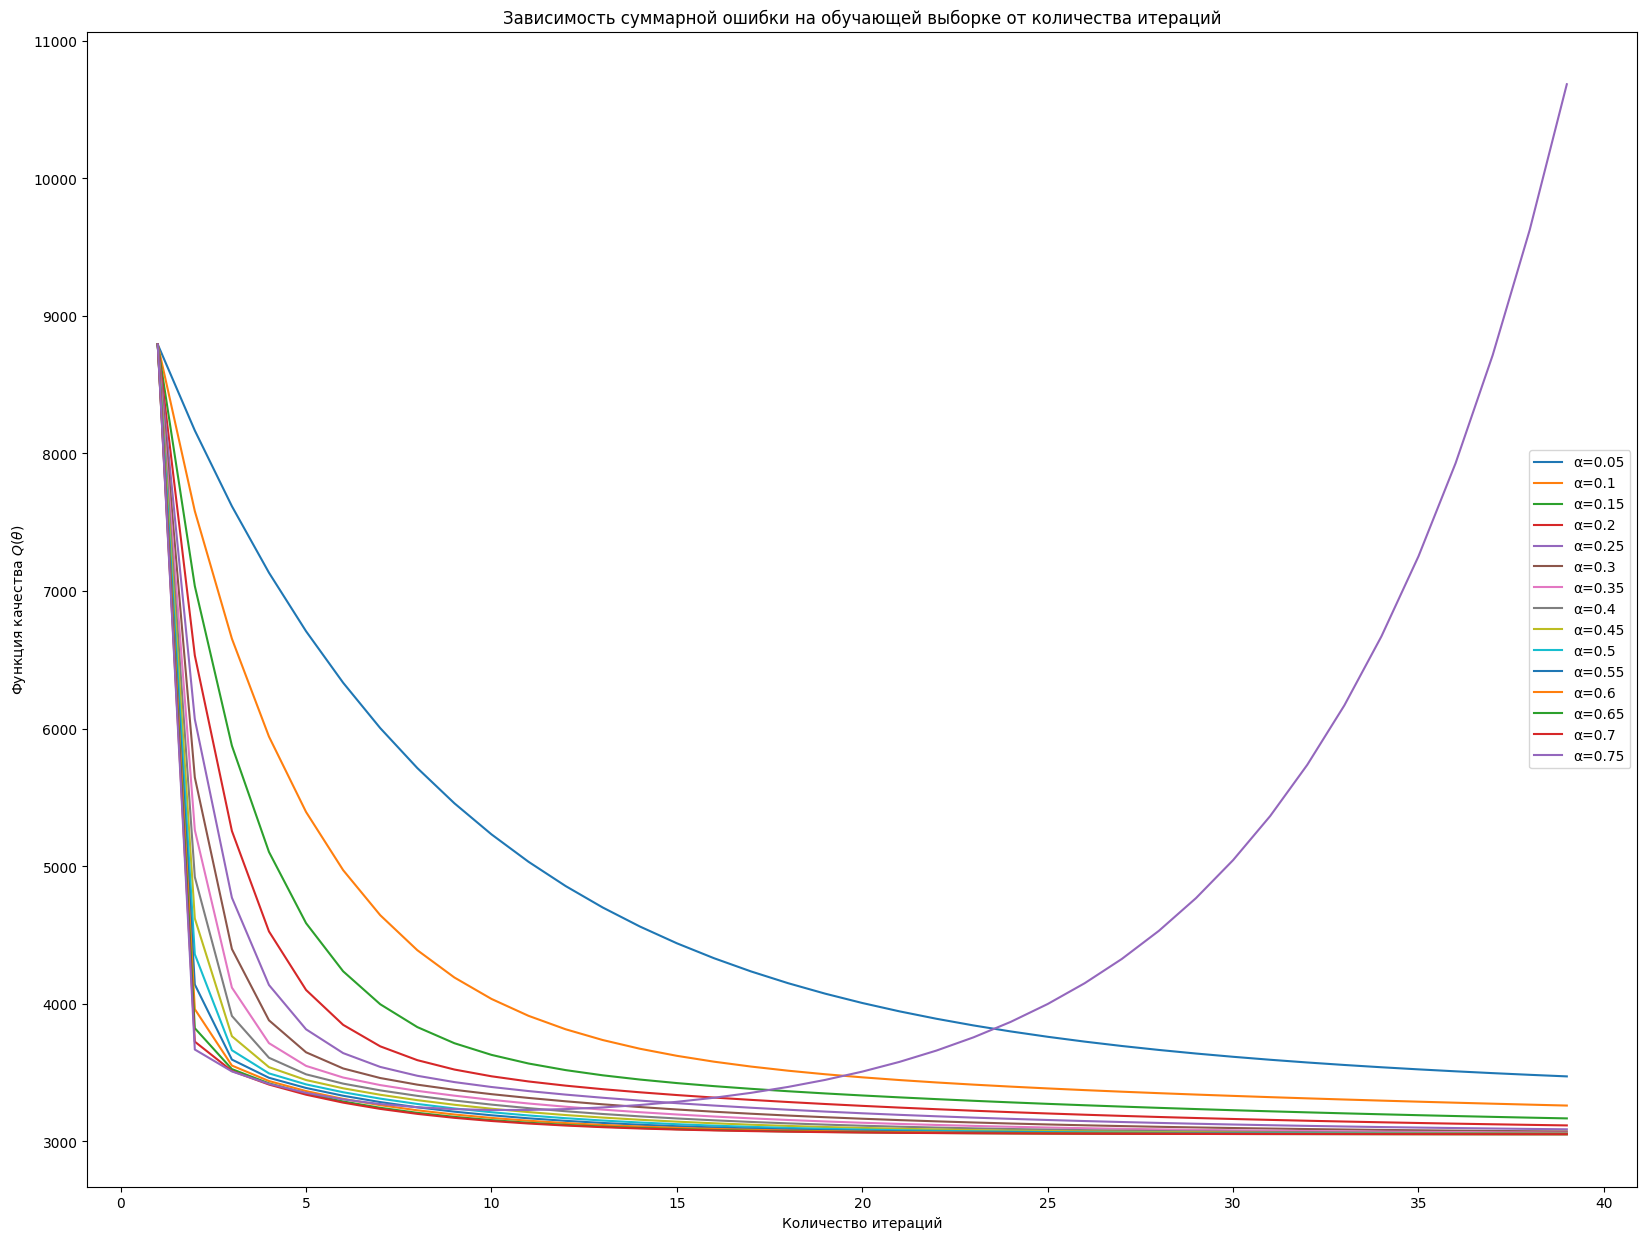

In [37]:
# Используйте следующий код, чтобы построить график скорости обучения.
# Для построения графика функции качества необходимо заполнить списки iters и costs
# Можно построить несколько кривых на одном графике, соответствующих разным скоростям обучения, чтобы выбрать наилучшую
#

plt.figure(figsize=(20, 15))
iters = list(range(1, 40))

for lr in range(5, 80, 5):
    my_model.alpha = lr / 100
    costs = []
    for j in iters:
        result = my_model.fit_with_GD(X_train_processed, y_train, j)
        if isinstance(result, (list, np.ndarray)):
            costs.append(result[-1])
        else:
            costs.append(result)  # если скаляр
    plt.plot(iters[:len(costs)], costs, label=f'α={my_model.alpha}')

plt.xlabel('Количество итераций')
plt.ylabel(r'Функция качества $Q(\theta)$')
plt.title('Зависимость суммарной ошибки на обучающей выборке от количества итераций')
plt.legend()
plt.show()


Проведен ряд тестов различных параметров скорости обучения α (альфа) от 0,05 до 0,75 с шагом 0,05, количество итераций 40.
Сформирован график зависимости функции качества от количества итераций и проведен анализ графика.
По результатам анализа можно сделать следующие выводы:
1.   Кривые всех показателей скорости быстро снижаются в самом начале, кроме α = 0,05; 0,1, поэтому их исключаем из выбора;
2.   После 5 итерации α = 0,75 начинает рости функция стоимости, поэтому данный показатель исключаем.
3.   Оставшиеся показатели α  можно рассматривать как потенциально используемые. Самый низкий показатель функции качества наблюдается при α = 0,7.
4.   Примененный показатель скорости обучения к нашей функции *fit_with_GD* дает самый низкий показатель стоимости **Cost: 3052.1156**, что говорит о удачном выборе скорости обучения.



- - -
#### 6. Решить систему нормальных уравнений (метод наименьших квадратов) (0.5 балла)

Как было показано на лекциях, решить задачу построения модели линейной регрессии можно в явном виде с помощью системы нормальных уравнений. Использование формулы для решения системы нормальных уравнений матричным способом не требует нормирования признаков, подбора гиперпараметров и может быть легко реализовано в коде:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Обратите внимание, что здесь так же нужно добавить столбец из единиц в матрицу $\mathbf{X}$, чтобы найти свободный член (смещение).

In [50]:
# Реализуйте метод fit_with_normal_equations класса LinearRegressionModel перед тем,
# как выполнить приведенный ниже код

class LinearRegressionModel:
    def __init__(self):
        self.theta = None

    def fit_with_normal_equations(self, X, y):
        # Добавляем столбец из единиц для учета свободного члена
        X_b = np.column_stack((np.ones(X.shape[0]), X))


        # использовать псевдообратную матрицу np.linalg.pinv
        self.theta = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y

        # Вычисляем предсказания
        y_pred = X_b @ self.theta

        # Вычисляем функцию стоимости (MSE)
        cost = np.mean((y - y_pred) ** 2)

        return cost

    def __str__(self):
        return f'LinearRegressionModel(theta={self.theta})'


my_normal_equations_model = LinearRegressionModel()
cost = my_normal_equations_model.fit_with_normal_equations(X_train_processed, y_train)

print(cost)
print(my_normal_equations_model)

6104.080953414009
LinearRegressionModel(theta=[ 82.35158881  55.52926741 -72.80557178 -15.66595031  -9.69447001
  -2.04585815  -8.59971935  -2.89680163  29.51065124  26.01058985])


- - -
#### 7. Сравнить разные методы (1.5 балла)

Оцените и сравните решения задачи построения уравнения линейной регрессии методом градиентного спуска и методом решения системы нормальных уравнений (методом наименьших квадратов). В теории они должны быть одинаковыми или хотя бы схожими. Для более полной оценки следует воспользоваться встроенной в библиотеку `sklearn` реализацией [алгоритма **Stochastic Gradient Descent (SGD)**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) в качестве третьего метода для сравнения. Для каждого метода (и полученной с его помощью модели) необходимо вычислить RMSE на **тестовой выборке** как меру производительности. Вы можете использовать готовые функции из библиотеки для вычисления, как показано ниже, вместо того чтобы писать собственный код:

- Какой из методов является наиболее производительным на заданном по варианту датасете?
- Как вы оцениваете ошибку каждой из построенных моделей? Приемлемо? Средне? Плохо?

+2 дополнительных балла за добавление к сравнению еще трех методов: встроенной реализации метода наименьших квадратов ([`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), гребневой регрессии (метод регуляризации Тихонова, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)) и регрессии ([`LASSO`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)).

In [81]:
from sklearn.metrics import mean_squared_error

# Использование встроенной реализации метода стохастического градиентного спуска для построения модели
from sklearn.linear_model import SGDRegressor

my_sgd_model = SGDRegressor()
my_sgd_model.fit(X_train_processed, y_train)
y_predict = my_sgd_model.predict(X_test_processed)
mse = mean_squared_error(y_test, y_predict)
my_sgd_model_rmse = np.sqrt(mse)


my_model = LinearRegressionModel()
my_model.fit_with_GD(X_train_processed, y_train)
y_predict = my_model.predict(X_test_processed)
mse = mean_squared_error(y_test, y_predict)
my_model_rmse_gd = np.sqrt(mse)


my_model = LinearRegressionModel()
my_model.fit_with_normal_equations(X_train_processed, y_train)
y_predict = my_model_eq.predict(X_test_processed)
mse = mean_squared_error(y_test, y_predict)
my_model_rmse_eq = np.sqrt(mse)


my_model = LinearRegression()
my_model.fit(X_train_processed, y_train)
y_predict = my_model.predict(X_test_processed)
mse = mean_squared_error(y_test, y_predict)
my_model_rmse_lr = np.sqrt(mse)


my_model = Ridge()
my_model.fit(X_train_processed, y_train)
y_predict = my_model.predict(X_test_processed)
mse = mean_squared_error(y_test, y_predict)
my_model_rmse_ridge = np.sqrt(mse)


my_model = Lasso()
my_model.fit(X_train_processed, y_train)
y_predict = my_model.predict(X_test_processed)
mse = mean_squared_error(y_test, y_predict)
my_model_rmse_lasso = np.sqrt(mse)



results = [
    ('Градиентный спуск', my_model_rmse_gd),
    ('Нормальные уравнения', my_model_rmse_eq),
    ('SGD', my_sgd_model_rmse),
    ('LinearRegression', my_model_rmse_lr),
    ('Ridge', my_model_rmse_ridge),
    ('LASSO', my_model_rmse_lasso),
]

best_method_name, best_rmse = min(results, key=lambda x: x[1])

print("Результаты сравнения моделей:")
for name, rmse in results:
    print(f"{name}: RMSE={rmse:.6f}")

print(f"\nЛучший метод: {best_method_name} RMSE={best_rmse:.6f}")

Результаты сравнения моделей:
Градиентный спуск: RMSE=77.881304
Нормальные уравнения: RMSE=77.880917
SGD: RMSE=77.993510
LinearRegression: RMSE=77.880917
Ridge: RMSE=77.880910
LASSO: RMSE=78.149880

Лучший метод: Ridge с RMSE=77.880910


**Наиболее производительный метод:**

Самое низкое значение RMSE показывает Ridge-регрессия (77.880910).
Это говорит о том, что Ridge лучше всего справляется с задачей предсказания на данном датасете среди рассмотренных методов.

**Оценка ошибок каждой модели:**

Все модели показывают очень близкие значения RMSE, что свидетельствует о стабильности и схожести их предсказаний.
Разница между лучшей (Ridge) и худшей (LASSO) — около 0.26 — очень мала, что говорит о том, что выбор метода не критичен в данном случае.

Ошибки находятся в диапазоне среднего уровня и требуют дальнейшего анализа для определения их приемлемости в контексте конкретной задачи и данных.

- - -
#### 8. Опишите полученные результаты (0.5 балла)

Напишите краткие выводы объемом в один абзац, ориентированные на нетехническую аудиторию (например, на вашего менеджера или начальника). Сосредоточьтесь на следующих вопросах:

- Как вы можете эффектно и эффективно представить ваше решение для проблемы прогнозирования целевой переменной из вашего датасета?
- Что вы узнали о проблеме на данный момент?
- Как можно улучшить ваше решение?

На основе анализа данных по загрязнению воздуха в Пекине мы разработали модель, которая позволяет точно прогнозировать уровень частиц PM2.5, что важно для оценки качества воздуха и защиты здоровья населения. Мы узнали, что наиболее надежным методом является использование специальных методов регрессии, которые дают стабильные и точные результаты. Чтобы сделать наши прогнозы еще более точными и полезными, стоит дополнительно улучшить модель за счет расширения данных, настройки параметров и использования более сложных алгоритмов.

Чтобы эффективно представить наше решение по прогнозированию уровня PM2.5, я бы использовал простую и наглядную визуализацию — например, график сравнения фактических и предсказанных значений, показывающий, насколько точно работает модель.

Это поможет принимать более обоснованные решения по управлению качеством воздуха и снижению его вредных воздействий.

- - -
### Нужна помощь?

Если у вас возникли трудности при выполнении задания, попробуйте следующие решения:

- Посмотрите слайды к презентации по регрессионному анализу и методам наименьших квадратов, градиентного спуска и стохастического градиентного спуска. Слайды можно найти в личном кабинете или в ТГ-канале курса.
- Задайте вопрос преподавателю в ТГ-канале курса.
- Задайте вопрос преподавателю лично в университете.